

# Project: Investigate the Google Books  Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The selected dataset was acquired from Google Books store using google API. the dataset contains xx books each book has xx feature. the data gathered will help in exploring popularity of books and using the following analysis I will examine the correlations between the features in a tryy to determined what features can make a book popular. 

### Resources
These website were used in the creation of the code below.
<li><b>Dataset</b> :https://www.kaggle.com/bilalyussef/google-books-dataset</li>
<li>https://www.w3schools.com/</li>
<li>https://pandas.pydata.org/</li>
<li>https://stackoverflow.com/</li>


In [2]:
# imports and load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


<a id='wrangling'></a>
## Data Wrangling
in this step I will explor dataset column and datatypes and drop un-needed columns for this project.

### General Properties

In [3]:
# Load data from books.csv 
books = pd.read_csv('google/google_books_1299.csv',sep=',',error_bad_lines=False)
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1299 non-null   int64  
 1   title           1299 non-null   object 
 2   author          1299 non-null   object 
 3   rating          1224 non-null   float64
 4   voters          1224 non-null   object 
 5   price           1299 non-null   float64
 6   currency        1299 non-null   object 
 7   description     1296 non-null   object 
 8   publisher       1299 non-null   object 
 9   page_count      1299 non-null   int64  
 10  generes         1299 non-null   object 
 11  ISBN            1299 non-null   object 
 12  language        1299 non-null   object 
 13  published_date  1299 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 142.2+ KB


In [4]:
books.head(1)

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,"Jul 31, 2014"


## Observation

1) We have total <b>14 columns</b> with a max of <b>1299  entries</b> in each column.<br/>
2) Data has no missing values nor nulls.<br/>
3) Some columns need renaming and shorten for better usage and display.<br/>
4) Some columns are not needed for this analysis and will be dropped.<br/>
5) For this analysis we don't need "published_date" I will extract year in a new column.<br/>
6) Columns except "voters" are in good data type, I will change voters data types to int64.<br/>

## Dropping unwanted columns

In [5]:
books.drop(['Unnamed: 0','description','ISBN'],axis =1,inplace = True)

In [6]:
books.columns

Index(['title', 'author', 'rating', 'voters', 'price', 'currency', 'publisher',
       'page_count', 'generes', 'language', 'published_date'],
      dtype='object')

In [7]:
# extract publication year to a new column
books['published_year']=books['published_date'].str[-4:]

In [8]:
books.drop(['published_date'],axis =1,inplace = True)

## Renaming columns

In [9]:
books.rename(columns={'language':'lang','page_count': 'pages','voters':'votes'},inplace=True)

### Data Cleaning 
in this step I will examine the data for duplicates and empty / NAN fields.

In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1299 non-null   object 
 1   author          1299 non-null   object 
 2   rating          1224 non-null   float64
 3   votes           1224 non-null   object 
 4   price           1299 non-null   float64
 5   currency        1299 non-null   object 
 6   publisher       1299 non-null   object 
 7   pages           1299 non-null   int64  
 8   generes         1299 non-null   object 
 9   lang            1299 non-null   object 
 10  published_year  1299 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 111.8+ KB


<b>We have some missing data in columns (rating , voters)</b>

In [11]:
#checking for null values
books[books.rating.isna()]

,title,author,rating,votes,price,currency,publisher,pages,generes,lang,published_year
18,Ask A Footballer,James Milner,NaN,NaN,98.42,SAR,Hachette UK,320,"Biography &amp, Autobiography , Sports",English,2019
48,Martha Stewart's Cookie Perfection: 100+ Recip...,Editors of Martha Stewart Living,NaN,NaN,66.87,SAR,Clarkson Potter,256,"Cooking , Methods , Baking",English,2019
58,The Guardians: The explosive new thriller from...,John Grisham,NaN,NaN,98.42,SAR,Hachette UK,384,"Fiction , Thrillers , Suspense",English,2019
63,Marketing (The Brian Tracy Success Library),Brian Tracy,NaN,NaN,29.40,SAR,AMACOM,112,"Business &amp, Economics , Marketing , General",English,2014
78,No Mercy: The brand new novel from the Queen o...,Martina Cole,NaN,NaN,98.42,SAR,Hachette UK,416,"Fiction , Crime",English,2019
...,...,...,...,...,...,...,...,...,...,...,...
1244,Marketing (The Brian Tracy Success Library),Brian Tracy,NaN,NaN,29.40,SAR,AMACOM,112,none,English,2014
1265,Martha Stewart's Cookie Perfection: 100+ Recip...,Editors of Martha Stewart Living,NaN,NaN,66.87,SAR,Clarkson Potter,256,"Cooking , Courses &amp, Dishes , Cookies",English,2019
1288,The Essentials of Finance and Accounting for N...,Edward Fields,NaN,NaN,58.99,SAR,AMACOM,320,"Business &amp, Economics , Accounting , General",English,2011
1290,Management (The Brian Tracy Success Library),Brian Tracy,NaN,NaN,38.44,SAR,AMACOM,112,none,English,2014


<b>Rating and votes are not mandatory for every book, I will set the Nan values to 0 as it will not affect the analysis</b>

In [12]:
books.fillna(0,inplace=True)

In [13]:
books.isna().sum()

title             0
author            0
rating            0
votes             0
price             0
currency          0
publisher         0
pages             0
generes           0
lang              0
published_year    0
dtype: int64

In [14]:
# checking for duplicates
books.duplicated().sum()

351

In [15]:
books[books.duplicated()]

,title,author,rating,votes,price,currency,publisher,pages,generes,lang,published_year
23,The Mysterious Affair at Styles (Poirot),Agatha Christie,4.6,57,19.28,SAR,HarperCollins UK,208,none,English,2010
82,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,Kodansha Comics,192,none,English,2014
86,Heart and Brain: An Awkward Yeti Collection,The Awkward Yeti,4.7,87,33.14,SAR,Andrews McMeel Publishing,144,none,English,2015
110,"A Feast for Crows (A Song of Ice and Fire, Boo...",George R.R. Martin,4.5,832,29.29,SAR,HarperCollins UK,864,none,English,2011
136,Crossroads of Twilight: Book Ten of 'The Wheel...,Robert Jordan,4.4,427,33.42,SAR,Tor Fantasy,704,none,English,2010
...,...,...,...,...,...,...,...,...,...,...,...
1291,The Essentials of Finance and Accounting for N...,Edward Fields,0.0,0,58.99,SAR,AMACOM,320,none,English,2011
1292,Eeny Meeny: DI Helen Grace 1,M. J. Arlidge,4.2,278,42.16,SAR,Penguin UK,464,none,English,2014
1293,The Infinite Game,Simon Sinek,3.8,4,71.63,SAR,Penguin,272,none,English,2019
1296,How to Understand Business Finance: Edition 2,Bob Cinnamon,3.5,4,46.85,SAR,Kogan Page Publishers,176,none,English,2010


>As I examin the duplicates I noticed that the geners column is affecting the duplicate result. so I will exclude it<br>
 

In [19]:
books.duplicated(subset=books.columns.difference(['geners'])).sum()

351

In [21]:
len(books.title.unique())

246

In [128]:
books.drop_duplicates(inplace=True)

In [129]:
# Rechecking for duplicates
books.duplicated().sum()

0

## Observation

Null values and duplicated rows has been handeled. The data now has no null or missing values and has no duplicated rows.

### Final Dataset after cleaning

In [130]:
books.shape

(948, 11)

### Adjusting column data and data types

In [131]:
# the publication_year column is not in correct datatype
books['published_year']=books['published_year'].astype('category')
# the lang column is not in correct datatype
books['lange']=books['lang'].astype('category')
books.dtypes

title               object
author              object
rating             float64
votes               object
price              float64
currency            object
publisher           object
pages                int64
generes             object
lang                object
published_year    category
lange             category
dtype: object

In [132]:
books['votes']=books['votes'].str.replace(',','')
books.dtypes

title               object
author              object
rating             float64
votes               object
price              float64
currency            object
publisher           object
pages                int64
generes             object
lang                object
published_year    category
lange             category
dtype: object

In [133]:
books.head(20)
books['votes'].fillna(0,inplace=True)
books['votes']=books['votes'].astype('float64')

In [134]:
print("Final columns in dataset (Rows,Columns) : ",books.shape)

Final columns in dataset (Rows,Columns) :  (948, 12)


In [135]:
books.head(10)

,title,author,rating,votes,price,currency,publisher,pages,generes,lang,published_year,lange
0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428.0,43.28,SAR,Kodansha Comics,192,none,English,2014,English
1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23.0,26.15,SAR,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",English,2007,English
2,The Art of Super Mario Odyssey,Nintendo,3.9,9.0,133.85,SAR,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",English,2019,English
3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10.0,26.15,SAR,Kensington Publishing Corp.,320,none,English,2009,English
4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577.0,28.54,SAR,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",English,2009,English
5,"A Feast for Crows (A Song of Ice and Fire, Boo...",George R.R. Martin,4.5,832.0,29.29,SAR,HarperCollins UK,864,none,English,2011,English
6,God of War: The Official Novelization,J.M. Barlog,4.5,94.0,15.82,SAR,Titan Books,400,"Fiction , Media Tie-In",English,2018,English
7,Edgedancer: From the Stormlight Archive,Brandon Sanderson,4.8,221.0,36.79,SAR,Tor Books,226,"Fiction , Fantasy , Epic",English,2017,English
8,"Blood, Sweat, and Pixels: The Triumphant, Turb...",Jason Schreier,4.3,135.0,50.25,SAR,HarperCollins,304,"Games &amp, Activities , Video &amp, Electronic",English,2017,English
9,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47.0,41.82,SAR,Pan Macmillan,112,"Biography &amp, Autobiography , Medical (incl....",English,2019,English


<b>Nominal variables:</b> title, authors,publisher<br>
<b>Categorical variables: </b>lang , published_year<br>
<b>Quantitative variable:</b> pages,votes<br>
<b>Qualitative Variable:</b> rating<br>


<a id='eda'></a>
## Exploratory Data Analysis

In this section I'm trying to answer the following questions:
<ol>
<li>Calcualte and visualize the books/language ratio</li>
<li>which year has the <b>max/min production</b> of books</li>
<li>which books has the <b>max/min ratings </b></li>
<li>which books has the<b> max/min votes </b> of all times</li>
<li>which authors has the <b>max/min votes</b></li>
<li>which authors has the <b>max/min ratings</b> </li>
</ol>



### Summary statistics

In [235]:
books.describe()

,rating,price,pages
count,948.000000,948.000000,9.480000e+02
mean,4.145992,47.098439,1.031783e+10
std,1.119895,52.757294,3.176819e+11
min,0.000000,0.000000,7.000000e+00
25%,4.100000,23.850000,2.080000e+02
50%,4.500000,39.340000,3.200000e+02
75%,4.700000,59.030000,4.160000e+02
max,5.000000,886.080000,9.781302e+12


> We have outlier values in price

### Analysis of Geners data
## What should we publish?

A first attamp to analys the books market is to examine publishing ratio per gener. a popular book gener among publishing companies is considered as a safe pet but focusing on smaller section of the market can give us a competitve edge.

In [136]:
# Extracting generes into a list
genrs=books.groupby('generes').count()['title'].reset_index()
l=genrs.generes.tolist()
geners=set(','.join(l).split(','))
geners=[x.strip(' ') for x in geners]
geners=[x.strip(' &amp') for x in geners]

### What are the geners with the highest production ratio

In [142]:
gen_dict=dict.fromkeys(geners, 0)
for i in geners:
    x=books.generes.str.contains(i).sum()
    gen_dict[i]=x 
#convert dictionary to a series
gen_df = pd.Series(gen_dict).reset_index()
gen_df.rename(columns={'index':'gener',0: 'Ratio'},inplace=True)
gen_df.sort_values(by='Ratio',ascending=False,inplace=True)

# Discard geners with less than 5 books
gen_df=gen_df[gen_df.Ratio>=10]

# top 20 publishing geners
gen_dft20=gen_df.head(20).copy()
gen_dft20.set_index('gener',drop=True)
gen_dft20.Ratio=round(gen_dft20.Ratio/books.shape[0]*100)
gen_dft20

C:\Users\shaimaa\miniconda3\envs\myenv\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,gener,Ratio
116,Fiction,44.0
67,none,24.0
103,General,17.0
98,Business,12.0
156,Economics,12.0
16,Fantasy,11.0
30,Mystery,10.0
15,Detective,10.0
169,Thrillers,8.0
128,Science,6.0


<AxesSubplot:xlabel='Ratio', ylabel='gener'>

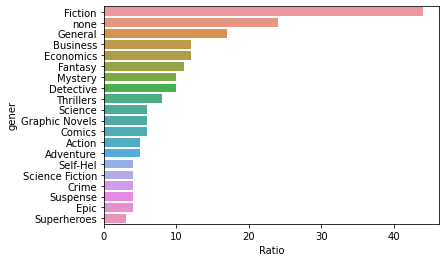

In [140]:
sb.barplot(y="gener",x="Ratio",data=gen_dft20)

> Fiction Books leading the market with almost 50% of books production.

### What are the geners with the lowest production ratio 

,gener,Ratio
143,Epic,3.691983
53,Superheroes,3.375527
81,Personal Growth,2.742616
151,Juvenile Fiction,2.215190
201,Women,2.109705
183,Motivational,1.898734
209,Women Sleuths,1.793249
50,Psychology,1.793249
129,Finance,1.687764
37,Autobiography,1.687764


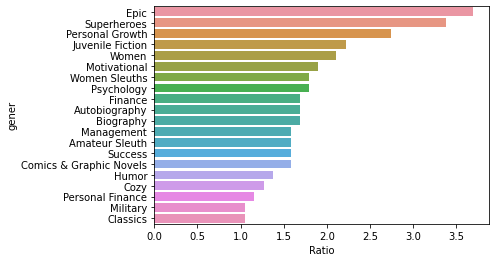

In [143]:
gen_dfl20=gen_df.tail(20).copy()

gen_dfl20.set_index('gener',drop=True)
gen_dfl20.Ratio=gen_dfl20.Ratio/books.shape[0]*100
sb.barplot(y="gener",x="Ratio",data=gen_dfl20)
gen_dfl20

> We have many promising geners to concure here, but to consider one of these geners as a safe invistment we need to combin sales data of each gener.

### Fiction or non-Fiction

In [144]:
x=[]
for i in books['generes']:
    if 'Fiction' in i:
        x.append('Fiction')
    else:
        x.append('Non-Fiction')
books['gener']=x

In [147]:
gen_mean=books.groupby('gener').mean().reset_index()
gen_mean

,gener,rating,votes,price,pages
0,Fiction,4.373923,818.059809,36.94488,4.970072e+02
1,Non-Fiction,3.966226,824.654717,55.10634,1.845529e+10


<AxesSubplot:xlabel='gener', ylabel='rating'>

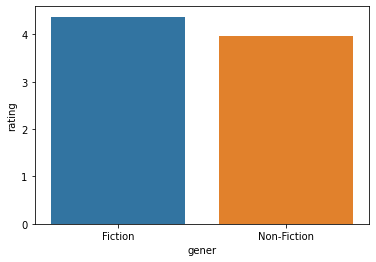

In [146]:
sb.barplot(x="gener",y="rating",data=gen_mean)

>The mean consumer rating for Fiction books is higher than the rating of non-Fiction books.

<AxesSubplot:xlabel='gener', ylabel='votes'>

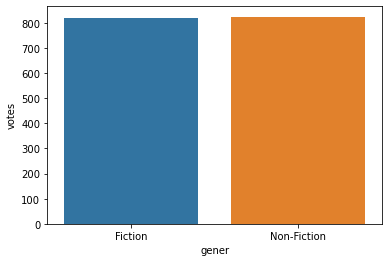

In [148]:
sb.barplot(x="gener",y="votes",data=gen_mean)

> the 2 categories has the same engagement, consumers votes for both categories with no significant difference.

<AxesSubplot:xlabel='gener', ylabel='price'>

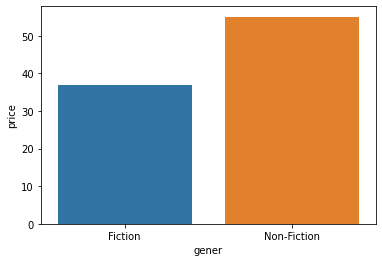

In [149]:
sb.barplot(x="gener",y="price",data=gen_mean)

>Fiction books average prices 34% lower than non-Fiction books, publishing Fictions books with prices higher than the $37 average will be a risk.

Text(0, 0.5, 'votes')

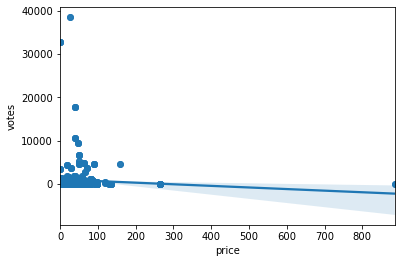

In [409]:
sb.regplot(data = books, x = 'price', y = 'votes');
plt.xlabel('price')
plt.ylabel('votes')

> Price and votes has a negative correlation. the more the price, the less the votes.<br>
The graph aslo shows outlier values which could affect the scatterplot.

Text(0, 0.5, 'votes')

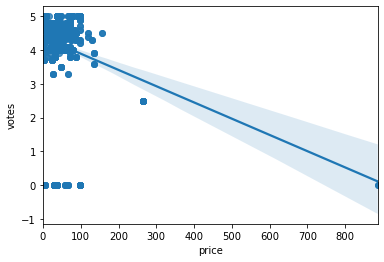

In [412]:
sb.regplot(data = books, x = 'price', y = 'rating');
plt.xlabel('price')
plt.ylabel('votes')

> Price and ratings has a negative correlation. the more the price, the less the rating.<br>
The next step is to analys the variabe corelation with and without outliers.

<AxesSubplot:xlabel='price'>

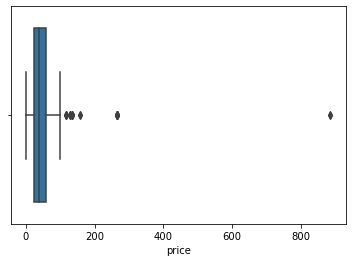

In [415]:
base_color = sb.color_palette()[0]
sb.boxplot(data = books, x = 'price', color=base_color)

In [42]:
eng_books=books.isin(['en-CA','en-GB','en-US','eng']).groupby('lang').count()['title']
eng_books

lang
False      586
True     10537
Name: title, dtype: int64

C:\Users\shaimaa\miniconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


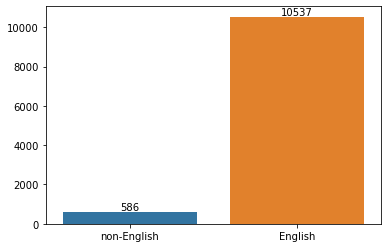

In [86]:
sb.barplot(['non-English','English'],eng_books.to_numpy())
 
for i in range (eng_books.shape[0]):
    count = eng_books[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text( x=i, y=count+500, s=count, ha = 'center', va='top')
    

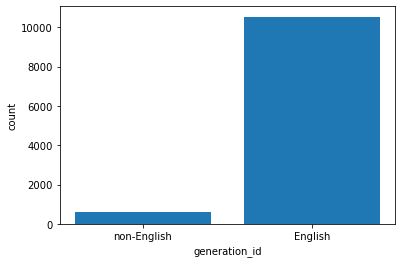

In [80]:
plt.bar(['non-English','English'],eng_books.to_numpy())
# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

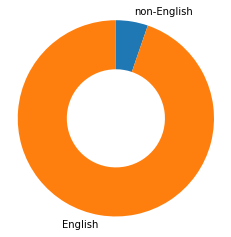

In [73]:
plt.pie(eng_books, labels = ['non-English','English'], startangle = 90, counterclock = False,wedgeprops = {'width' : 0.5});
plt.axis('square');

### 1. Books production during last 20 years

In [111]:
# Group data by year
yearly_prod=books.groupby('publication_year').count()['title'].tail(20)
years=yearly_prod.reset_index()
years

,publication_year,title
0,2001,656
1,2002,798
2,2003,931
3,2004,1069
4,2005,1260
5,2006,1700
6,2007,518
7,2008,49
8,2009,42
9,2010,37


<BarContainer object of 20 artists>

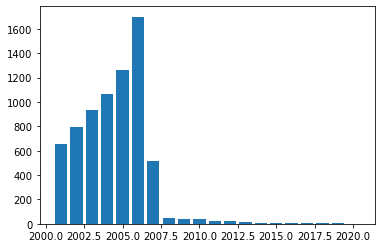

In [113]:
plt.bar(years.publication_year.to_numpy(),years.title)

In [114]:
print('Average production in the last 10 years: ',years.mean())
print('Max production : ',years.max())
print('Min production : ',years.min())


Average production in the last 10 years:  title    358.2
dtype: float64
Max production :  title    1700
dtype: int64
Min production :  title    1
dtype: int64


(array([1.1052e+04, 3.8000e+01, 1.3000e+01, 8.0000e+00, 7.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([      0. ,  459766.6,  919533.2, 1379299.8, 1839066.4, 2298833. ,
        2758599.6, 3218366.2, 3678132.8, 4137899.4, 4597666. ]),
 <BarContainer object of 10 artists>)

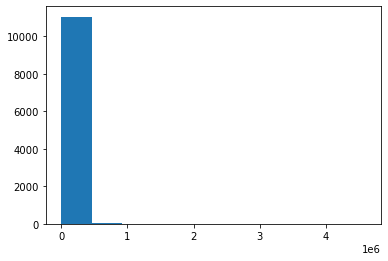

### 2. Top 20 rated books on Goodreads

In [151]:
### sort dataset by ratings
books_ratings=books[books.rating>4.5].sort_values(by='rating',ascending=False).head(20)
books_ratings.set_index('title',drop=True,inplace=True)
books_ratings


,author,rating,votes,price,currency,publisher,pages,generes,lang,published_year,lange,gener
title,,,,,,,,,,,,
Competitive Advantage: Creating and Sustaining Superior Performance,Michael E. Porter,5.0,6.0,78.72,SAR,Simon and Schuster,592,"Business &amp, Economics , General",English,2008,English,Non-Fiction
Summary: The Compound Effect,Nine99 Innovation Lab,5.0,1.0,3.94,SAR,Nine99 Innovation Lab (OPC) Pvt Ltd,7,"Business & Economics , Mentoring & Coaching",English,2019,English,Non-Fiction
The Red Signal: An Agatha Christie Short Story,Agatha Christie,5.0,4.0,7.50,SAR,HarperCollins UK,40,"Fiction , Short Stories (single author)",English,2011,English,Fiction
The Queen of Nothing (The Folk of the Air #3),Holly Black,5.0,11.0,36.86,SAR,Bonnier Zaffre Ltd.,448,"Young Adult Fiction , Family , General",English,2019,English,Fiction
The Queen of Nothing (The Folk of the Air #3),Holly Black,5.0,11.0,36.86,SAR,Bonnier Zaffre Ltd.,448,"Young Adult Fiction , Fantasy , Epic",English,2019,English,Fiction
Start Day Trading Now: A Quick and Easy Introduction to Making Money While Managing Your Risk,Michael Sincere,5.0,2.0,47.22,SAR,Simon and Schuster,224,"Business &amp, Economics , Personal Finance , ...",English,2011,English,Non-Fiction
Indistractable: How to Control Your Attention and Choose Your Life,Nir Eyal,5.0,2.0,69.24,SAR,Bloomsbury Publishing,400,"Self-Help , Self-Management , Stress Management",English,2019,English,Non-Fiction
Final Option: 'The best one yet',Clive Cussler,5.0,3.0,93.75,SAR,Penguin UK,400,none,English,2019,English,Non-Fiction
Home Work: A Memoir of My Hollywood Years,Julie Andrews,5.0,1.0,98.42,SAR,Hachette UK,352,"Music , Genres &amp, Styles , Musicals",English,2019,English,Non-Fiction


### Top 20 Highest rating authors

Text(0.5, 1.0, 'Top 20 authors with highest rated books')

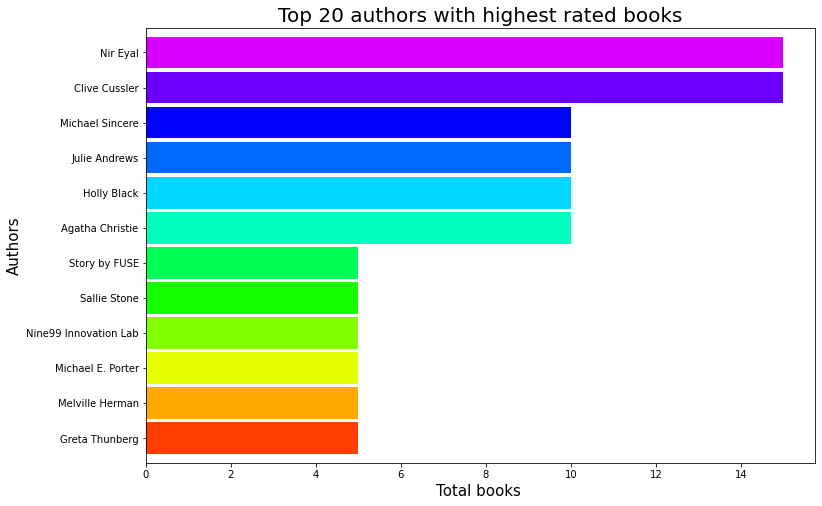

In [158]:
plt.subplots(figsize=(12,8))
ax = books_ratings.groupby("author").sum()['rating'].sort_values().plot.barh(width=0.9,color=sb.color_palette('gist_rainbow',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 20 authors with highest rated books",fontsize=20,color='black')

In [218]:
highest_rated=books[books['rating']>=4.5]
lowest_rated=books[books['rating']<=2.5]
print('\nHighest rated books\n',highest_rated[["title"]])
print('-'*40)
print('\nLowest rated books\n',lowest_rated[["title"]])


Highest rated books
                                                    title
0      Harry Potter and the Half-Blood Prince (Harry ...
3      Harry Potter and the Prisoner of Azkaban (Harr...
4      Harry Potter Boxed Set  Books 1-5 (Harry Potte...
6           Harry Potter Collection (Harry Potter  #1-6)
21     J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...
...                                                  ...
10675  Harry Potter and the Goblet of Fire (Harry Pot...
10790                                       Looking East
10918  Fullmetal Alchemist  Vol. 6 (Fullmetal Alchemi...
10937  The Price of the Ticket: Collected Nonfiction ...
10940  Code Check Electrical: An Illustrated Guide to...

[230 rows x 1 columns]
----------------------------------------

Lowest rated books
                                                    title
265    Out to Eat London 2002 (Lonely Planet Out to Eat)
375                       Juiced Official Strategy Guide
987             Open City 6: The Only

### 3.which book has the max/min reviews

In [223]:
max_reviews=books[books['reviews']==books['reviews'].max()]
max_reviews[["title","authors","rating","reviews"]].head()


,title,authors,rating,reviews
10336,Twilight (Twilight #1),Stephenie Meyer,3.59,94265


In [224]:
min_reviews=books[books['reviews']==books['reviews'].min()]
min_reviews[["title","authors","rating","reviews"]].head()

,title,authors,rating,reviews
31,Molly Hatchet - 5 of the Best,Molly Hatchet,4.33,0
77,The Power of One: The Solo Play for Playwright...,Louis E. Catron,3.67,0
80,What to Sell on ebay and Where to Get It: The ...,Chris Malta/Lisa Suttora,3.62,0
82,eBay: Top 100 Simplified Tips & Tricks,Julia Wilkinson,4.27,0
102,Dalit: The Black Untaouchables of India,V.T. Rajshekar/Y.N. Kly,4.20,0


<a id='conclusions'></a>
## Conclusions
Using the dataset samples (3854 after cleaning) and during years (1960 : 2015 ) I found the following:
<ul>
<li>Movie production is steadly increasing every year with an average around 170 movie per year in the last decade.</li>
<li>2011 was the year with the highest production with 199 movie released that year.</li>
<li> "Avatar" is the highest profit movie of the recorded samples also "The Warrior's Way" is the Lowest profit movie of of the recorded samples </li>
<li> Out of 3854 movies there were 22 movie with a vote average above 8 and 9 movies below 3.5 of vote average.</li>
<li> The genre "Comedy" has the highest profit of 12183078642 US dollar.</li>
<li> Comedy is the most poular genre of all movies in the dataset.</li>
</ul>

## Limitations
<li>The dataset contained missing values in (Budget, revenue) columns, which may affect the analysis after dropping rows of missing values:<br/>
Zero Budget rows: 5696 And Zero revenue rows: 6016

</li>

<li>
Mixed genres affect the genre profits analysis which can be improved by separate genrs or using another approach with this analysis.    
</li>
        
## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])